In [402]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [403]:
import pandas as pd 
df = pd.read_csv("input/adult.csv", skipinitialspace=True, na_values="?")

df.head(10)

,age,workclass,fnlwgt,educatoin,educatoin_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [404]:
# get information on abut the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   educatoin       32561 non-null  object
 4   educatoin_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [405]:
# Cahnge all the objects to categorial type
for col in ['workclass', 'educatoin', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    df[col] = df[col].astype('category')
    
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
educatoin         category
educatoin_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

In [406]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      29849
hours_per_week        0
dtype: int64


In [407]:
# count the number of missing values for each column
df['workclass'].isnull().sum()

1836

In [408]:
# count the number of missing values for each column
df['occupation'].isnull().sum()

1843

In [409]:
# count the number of missing values for each column
df['native_country'].isnull().sum()

583

In [410]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
educatoin            0
educatoin_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [411]:
df.count()

age               32561
workclass         30725
fnlwgt            32561
educatoin         32561
educatoin_num     32561
marital_status    32561
occupation        30718
relationship      32561
race              32561
sex               32561
capital_gain      32561
capital_loss      32561
hours_per_week    32561
native_country    31978
income            32561
dtype: int64

In [412]:
# drop all the rows having NaN
df = df.dropna()
df.head(10)

,age,workclass,fnlwgt,educatoin,educatoin_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [413]:
# number of rows after removing the NaN
df.count()

age               30162
workclass         30162
fnlwgt            30162
educatoin         30162
educatoin_num     30162
marital_status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital_gain      30162
capital_loss      30162
hours_per_week    30162
native_country    30162
income            30162
dtype: int64

In [414]:
# reset the index in the panda:
df = df.reset_index(drop=True)

In [415]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      27624
hours_per_week        0
dtype: int64


In [416]:
# count the number of missing values for each column
num_missing = (df[['age','fnlwgt','educatoin_num','capital_gain','hours_per_week']] == 0).sum()
# report the results
print(num_missing)

age                   0
fnlwgt                0
educatoin_num         0
capital_gain      27624
hours_per_week        0
dtype: int64


# Label Encoding

In [417]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()


# Converting string labels into numbers.

# workclass
df[['workclass']]=le.fit_transform(df[['workclass']])
print("workclass_encoded",df[['workclass']])

# marital_status
df[['marital_status']]=le.fit_transform(df[['marital_status']])
print("marital_status_encoded",df[['marital_status']])

# occupation
df[['occupation']]=le.fit_transform(df[['occupation']])
print("occupation_encoded",df[['occupation']])

# race
df[['race']] =le.fit_transform(df[['race']])
print("race_encoded", df[['race']])

# Sex
df[['sex']]=le.fit_transform(df[['sex']])
print("sex_encoded",df[['sex']])

# native_country
df[['native_country']]=le.fit_transform(df[['native_country']])
print("native_country_encoded",df[['native_country']])

# income
df[['income']]=le.fit_transform(df[['income']])
print("income_encoded",df[['income']])

workclass_encoded        workclass
0              5
1              4
2              2
3              2
4              2
...          ...
30157          2
30158          2
30159          2
30160          2
30161          3

[30162 rows x 1 columns]
marital_status_encoded        marital_status
0                   4
1                   2
2                   0
3                   2
4                   2
...               ...
30157               2
30158               2
30159               6
30160               4
30161               2

[30162 rows x 1 columns]
occupation_encoded        occupation
0               0
1               3
2               5
3               5
4               9
...           ...
30157          12
30158           6
30159           0
30160           0
30161           3

[30162 rows x 1 columns]
race_encoded        race
0         4
1         4
2         4
3         2
4         2
...     ...
30157     4
30158     4
30159     4
30160     4
30161     4

[30162 rows x 1 colu

C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\new\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Selecting Features

In [418]:
features=df[['age','workclass','educatoin_num','marital_status','occupation','race','sex','capital_gain','hours_per_week','native_country']]
features

,age,workclass,educatoin_num,marital_status,occupation,race,sex,capital_gain,hours_per_week,native_country
0,39,5,13,4,0,4,1,2174,40,38
1,50,4,13,2,3,4,1,0,13,38
2,38,2,9,0,5,4,1,0,40,38
3,53,2,7,2,5,2,1,0,40,38
4,28,2,13,2,9,2,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...
30157,27,2,12,2,12,4,0,0,38,38
30158,40,2,9,2,6,4,1,0,40,38
30159,58,2,9,6,0,4,0,0,40,38
30160,22,2,9,4,0,4,1,0,20,38


# Lable

In [419]:
label = df[['income']]
label

,income
0,0
1,0
2,0
3,0
4,0
...,...
30157,0
30158,1
30159,0
30160,0


# Put part of the data aside as an actual 

In [420]:
# Last 1000 records.
from sklearn.model_selection import train_test_split
features_, features_actual, label_, label_actual = train_test_split(features, label, test_size=0.03)
features_actual.count()

age               905
workclass         905
educatoin_num     905
marital_status    905
occupation        905
race              905
sex               905
capital_gain      905
hours_per_week    905
native_country    905
dtype: int64

# Split the data to Training Testing and actual

In [421]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features_, label_, test_size=0.30)

In [422]:
features_test.count()

age               8778
workclass         8778
educatoin_num     8778
marital_status    8778
occupation        8778
race              8778
sex               8778
capital_gain      8778
hours_per_week    8778
native_country    8778
dtype: int64

# Trainig the model

# Training before scaling

In [481]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(features_train,label_train)

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=7)

In [482]:
label_pred = classifier.predict(features_test)

In [483]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[5960  651]
 [ 853 1314]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6611
           1       0.67      0.61      0.64      2167

    accuracy                           0.83      8778
   macro avg       0.77      0.75      0.76      8778
weighted avg       0.82      0.83      0.83      8778



# Scalling

# Training with scaling

In [484]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [486]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(features_train,label_train)

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=7)

In [493]:
label_pred = classifier.predict(features_test)

In [494]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[5856  706]
 [ 856 1360]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6562
           1       0.66      0.61      0.64      2216

    accuracy                           0.82      8778
   macro avg       0.77      0.75      0.76      8778
weighted avg       0.82      0.82      0.82      8778



# Comparing Error Rate with the K Value

In [504]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, label_train)
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(8778,1)
    error.append(np.mean(pred_i != label_test))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-ve

Text(0, 0.5, 'Mean Error')

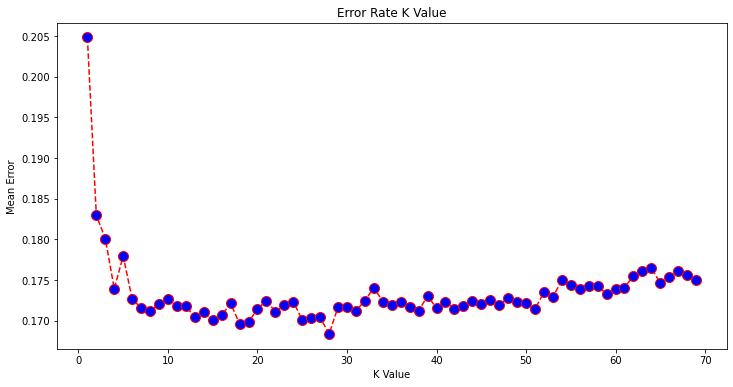

In [505]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [531]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(features_train,label_train)

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=26)

In [532]:
label_pred = classifier.predict(features_test)

In [533]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[6085  477]
 [1018 1198]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6562
           1       0.72      0.54      0.62      2216

    accuracy                           0.83      8778
   macro avg       0.79      0.73      0.75      8778
weighted avg       0.82      0.83      0.82      8778



# Increating the training set to 80% enhanced the accuracy by 1%

In [538]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.20)

In [539]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(features_train,label_train)

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(n_neighbors=26)

In [540]:
label_pred = classifier.predict(features_test)

In [541]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

[[4191  330]
 [ 686  826]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4521
           1       0.71      0.55      0.62      1512

    accuracy                           0.83      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033



# Decreasing the training set to 60% does not have effect on the accuracy

In [549]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(features_train,label_train)

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[8554  492]
 [1645 1374]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9046
           1       0.74      0.46      0.56      3019

    accuracy                           0.82     12065
   macro avg       0.79      0.70      0.73     12065
weighted avg       0.81      0.82      0.81     12065



Reducing the number of features for and check the accuracy. 

In [547]:
features=df[['age','workclass','educatoin_num','occupation','sex','capital_gain','hours_per_week']]
features

,age,workclass,educatoin_num,occupation,sex,capital_gain,hours_per_week
0,39,5,13,0,1,2174,40
1,50,4,13,3,1,0,13
2,38,2,9,5,1,0,40
3,53,2,7,5,1,0,40
4,28,2,13,9,0,0,40
...,...,...,...,...,...,...,...
30157,27,2,12,12,0,0,38
30158,40,2,9,6,1,0,40
30159,58,2,9,0,0,0,40
30160,22,2,9,0,1,0,20


In [550]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(features_train,label_train)

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[8509  587]
 [1593 1376]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      9096
           1       0.70      0.46      0.56      2969

    accuracy                           0.82     12065
   macro avg       0.77      0.70      0.72     12065
weighted avg       0.81      0.82      0.81     12065



In [552]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, label_train)
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(12065,1)
    error.append(np.mean(pred_i != label_test))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-ve

Text(0, 0.5, 'Mean Error')

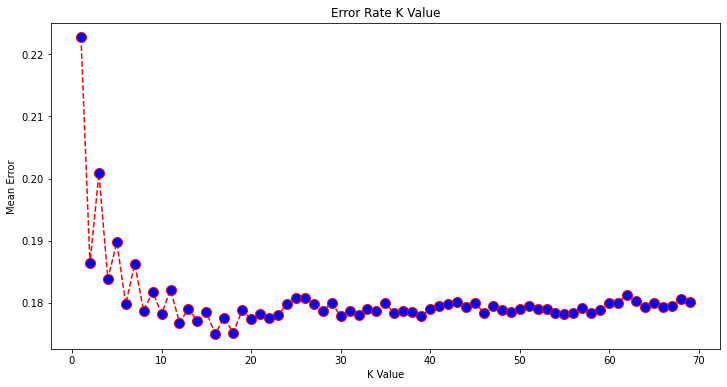

In [553]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [554]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train, label_train)
    pred_i = knn.predict(features_test)
    pred_i=pred_i.reshape(12065,1)
    error.append(np.mean(pred_i != label_test))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-ve

Text(0, 0.5, 'Mean Error')

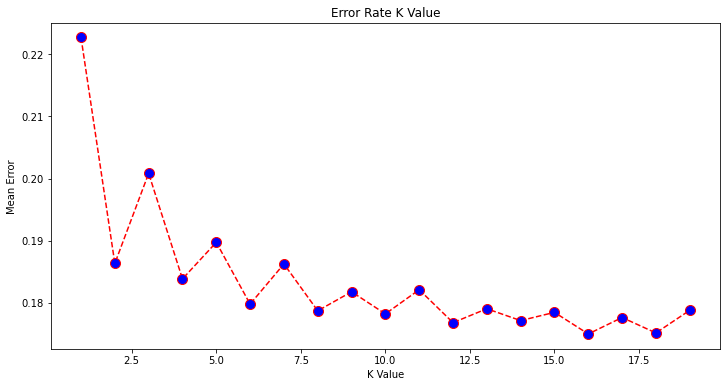

In [556]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [557]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.40)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(features_train,label_train)

label_pred = classifier.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(label_test, label_pred))
print(classification_report(label_test, label_pred))

C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


[[8578  480]
 [1630 1377]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      9058
           1       0.74      0.46      0.57      3007

    accuracy                           0.83     12065
   macro avg       0.79      0.70      0.73     12065
weighted avg       0.82      0.83      0.81     12065



# The reduction of number of features and the increase of training data didnt have huge effect on the accuracy

# The best value for K is 18 -> the elbow value